<a href="https://colab.research.google.com/github/Sj3604/Data-Science-Projects-/blob/main/Country.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/content/world-data-2023.csv")
print(df.info())
print(df.head)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    195 non-null    object 
 1   Density
(P/Km2)                            195 non-null    object 
 2   Abbreviation                               188 non-null    object 
 3   Agricultural Land( %)                      188 non-null    object 
 4   Land Area(Km2)                             194 non-null    object 
 5   Armed Forces size                          171 non-null    object 
 6   Birth Rate                                 189 non-null    float64
 7   Calling Code                               194 non-null    float64
 8   Capital/Major City                         192 non-null    object 
 9   Co2-Emissions                              188 non-null    object 
 10  CPI                       

In [2]:
# Clean the 'Armed Forces size' column: remove commas and convert to numeric
df['Armed Forces size'] = df['Armed Forces size'].str.replace(',', '', regex=False)
df['Armed Forces size'] = pd.to_numeric(df['Armed Forces size'])

# Sort by 'Armed Forces size' in descending order and display the top countries
top_armed_forces = df.sort_values('Armed Forces size', ascending=False).head(10)
display(top_armed_forces[['Country', 'Armed Forces size']])

,Country,Armed Forces size
77,India,3031000.0
36,China,2695000.0
127,North Korea,1469000.0
143,Russia,1454000.0
186,United States,1359000.0
131,Pakistan,936000.0
51,Egypt,836000.0
23,Brazil,730000.0
78,Indonesia,676000.0
162,South Korea,634000.0


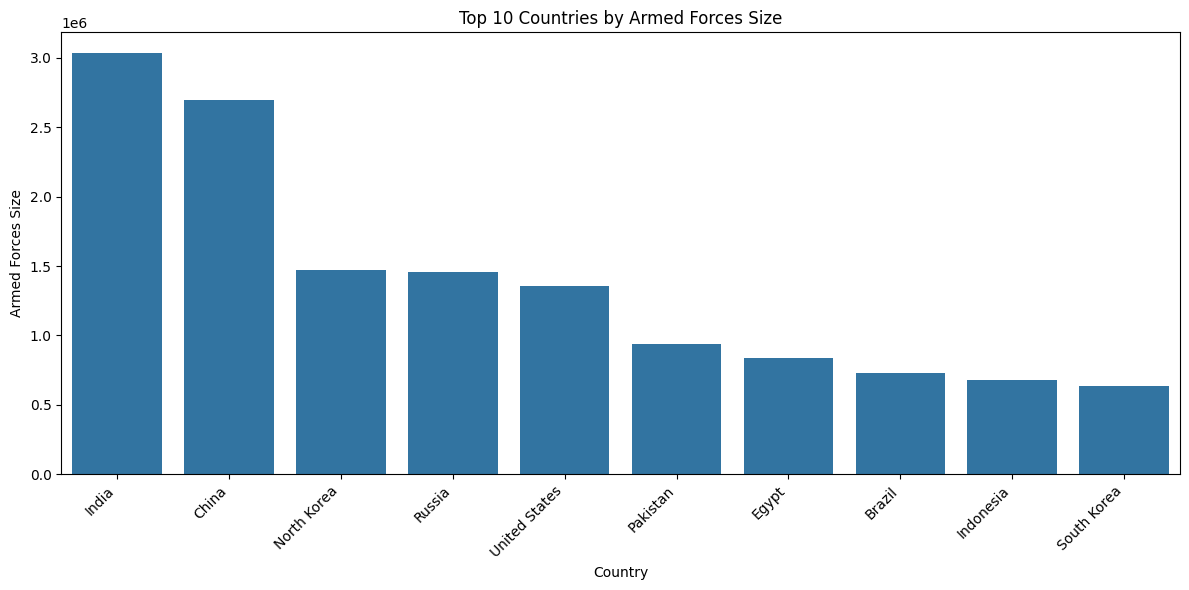

In [3]:
# Create a bar chart to visualize the top armed forces
plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='Armed Forces size', data=top_armed_forces)
plt.title('Top 10 Countries by Armed Forces Size')
plt.xlabel('Country')
plt.ylabel('Armed Forces Size')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

,Country,Physicians per thousand
42,Cuba,8.42
63,Georgia,7.12
113,Monaco,6.56
99,Lithuania,6.35
149,San Marino,6.11


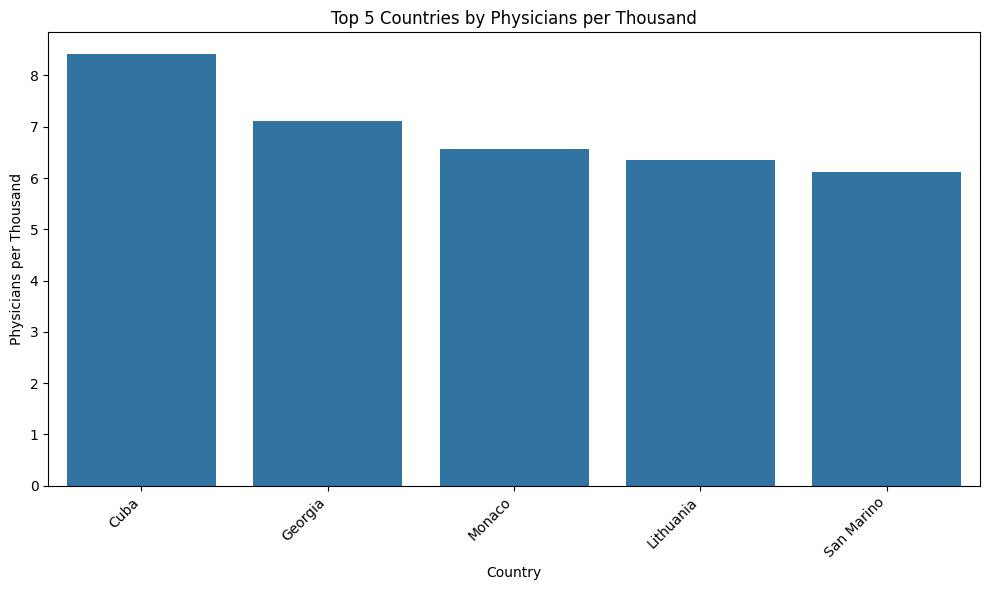

In [4]:
# Sort by 'Physicians per thousand' in descending order and display the top 5 countries
top_physicians = df.sort_values('Physicians per thousand', ascending=False).head(5)
display(top_physicians[['Country', 'Physicians per thousand']])

# Create a bar chart to visualize the top physicians per thousand
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='Physicians per thousand', data=top_physicians)
plt.title('Top 5 Countries by Physicians per Thousand')
plt.xlabel('Country')
plt.ylabel('Physicians per Thousand')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [5]:
# Find the row for India in the sorted DataFrame and get its index
india_physicians_rank = df.sort_values('Physicians per thousand', ascending=False).reset_index().loc[lambda x: x['Country'] == 'India']

if not india_physicians_rank.empty:
    rank = india_physicians_rank.index[0] + 1  # Add 1 because index is 0-based
    physicians_per_thousand = india_physicians_rank['Physicians per thousand'].iloc[0]
    print(f"India stands at position {rank} with {physicians_per_thousand:.2f} physicians per thousand people.")
else:
    print("India's data for Physicians per thousand is not available in the dataset.")

India stands at position 114 with 0.86 physicians per thousand people.


In [6]:
# Clean 'Unemployment rate': remove '%' and convert to numeric, coercing errors
df['Unemployment rate'] = df['Unemployment rate'].str.replace('%', '', regex=False)
df['Unemployment rate'] = pd.to_numeric(df['Unemployment rate'], errors='coerce')

# Clean 'GDP': remove '$' and ',', convert to numeric, coercing errors
df['GDP'] = df['GDP'].str.replace('$', '', regex=False).str.replace(',', '', regex=False)
df['GDP'] = pd.to_numeric(df['GDP'], errors='coerce')

# Calculate the correlation between 'Unemployment rate' and 'GDP'
correlation = df['Unemployment rate'].corr(df['GDP'])

print(f"The correlation between Unemployment Rate and GDP is: {correlation:.2f}")

The correlation between Unemployment Rate and GDP is: 0.03


In [7]:
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Remove self-correlations and find the pair with the highest absolute correlation
# Create a mask to exclude the upper triangle and the diagonal
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
correlation_matrix_masked = correlation_matrix.mask(mask)

# Find the pair with the maximum absolute correlation
max_correlation = correlation_matrix_masked.stack().abs().idxmax()
max_correlation_value = correlation_matrix_masked.stack().loc[max_correlation]

print(f"The two factors with the highest correlation are '{max_correlation[0]}' and '{max_correlation[1]}' with a correlation value of {max_correlation_value:.2f}")

The two factors with the highest correlation are 'Fertility Rate' and 'Birth Rate' with a correlation value of 0.98


**Summary of Highest Correlation:**

The analysis of the dataset revealed that 'Fertility Rate' and 'Birth Rate' are the two factors with the highest correlation, showing a strong positive correlation value of 0.98. This signifies a very close relationship between these two variables.

In [9]:
# Clean 'Land Area(Km2)': remove commas and convert to numeric, coercing errors
df['Land Area(Km2)'] = df['Land Area(Km2)'].astype(str).str.replace(',', '', regex=False)
df['Land Area(Km2)'] = pd.to_numeric(df['Land Area(Km2)'], errors='coerce')

# GDP column is already cleaned in a previous step, no need to clean again.
# Calculate the correlation between 'Land Area(Km2)' and 'GDP'
correlation_land_gdp = df['Land Area(Km2)'].corr(df['GDP'])

print(f"The correlation between Land Area(Km2) and GDP is: {correlation_land_gdp:.2f}")

The correlation between Land Area(Km2) and GDP is: 0.55


In [10]:
# Clean 'Forested Area (%)': remove '%' and convert to numeric, coercing errors
df['Forested Area (%)'] = df['Forested Area (%)'].astype(str).str.replace('%', '', regex=False)
df['Forested Area (%)'] = pd.to_numeric(df['Forested Area (%)'], errors='coerce')

# 'Land Area(Km2)' was cleaned in a previous step, no need to clean again.

# Calculate the correlation between 'Forested Area (%)' and 'Land Area(Km2)'
correlation_forested_land = df['Forested Area (%)'].corr(df['Land Area(Km2)'])

print(f"The correlation between Forested Area (%) and Land Area(Km2) is: {correlation_forested_land:.2f}")

The correlation between Forested Area (%) and Land Area(Km2) is: -0.01
